In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/gdrive/My Drive/DS_contest/trainSet.csv')
data

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),First 6 mo. Avg. GAS (Mcf),GAS_MONTH_1,GAS_MONTH_2,GAS_MONTH_3,GAS_MONTH_4,GAS_MONTH_5,GAS_MONTH_6,GAS_MONTH_7,GAS_MONTH_8,...,CND_MONTH_33,CND_MONTH_34,CND_MONTH_35,CND_MONTH_36,HRS_MONTH_1,HRS_MONTH_2,HRS_MONTH_3,HRS_MONTH_4,HRS_MONTH_5,HRS_MONTH_6,HRS_MONTH_7,HRS_MONTH_8,HRS_MONTH_9,HRS_MONTH_10,HRS_MONTH_11,HRS_MONTH_12,HRS_MONTH_13,HRS_MONTH_14,HRS_MONTH_15,HRS_MONTH_16,HRS_MONTH_17,HRS_MONTH_18,HRS_MONTH_19,HRS_MONTH_20,HRS_MONTH_21,HRS_MONTH_22,HRS_MONTH_23,HRS_MONTH_24,HRS_MONTH_25,HRS_MONTH_26,HRS_MONTH_27,HRS_MONTH_28,HRS_MONTH_29,HRS_MONTH_30,HRS_MONTH_31,HRS_MONTH_32,HRS_MONTH_33,HRS_MONTH_34,HRS_MONTH_35,HRS_MONTH_36
0,354,134,3323,3298,15384,10746,0.583087,0.520701,0.202393,2015/05/21,2015/05/01,2021/07/31,Oil: CWS-DynaGel,1197.61,66.53,3214.70,178.59,18,1249.60,73.50,1148.37,3248.30,2.57,0.96,Ceramic/Sand,FTecISP,30/50,35.48,638.70,638.70,558.91,99580.58333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,372,142,3073,3054,20167,10440,1.059932,0.402927,0.242269,2014/10/16,2014/10/01,2021/07/31,Water: SLB-WaterFrac (WF),4212.32,117.01,9727.20,270.20,36,2711.90,77.41,1604.27,11438.43,3.59,1.55,Ceramic/Sand,HydroProp,40/80,13.80,496.97,496.97,3715.35,82942.66667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,383,146,3318,3291,18832,10745,1.913723,0.351151,0.274381,2019/03/14,2019/03/01,2021/07/31,Slickwater,5131.40,95.03,52997.80,981.44,54,2275.37,42.88,914.98,52997.80,23.29,2.26,Sand,Sand,40/70,95.03,5131.40,0.00,5131.40,55833.66667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,395,148,3220,3188,20243,10884,0.185481,0.231014,0.305237,2019/03/19,2019/02/01,2021/07/31,Slickwater,3044.00,49.90,42791.76,701.50,61,2687.20,43.04,0.00,51059.60,15.92,1.13,Sand,White,40/70,49.90,3044.00,0.00,3044.00,95592.08333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,397,149,3220,3189,19085,10916,0.432910,0.214301,0.306795,2019/03/19,2019/02/01,2021/07/31,Slickwater,5374.00,99.52,50769.92,940.18,54,2351.45,42.70,0.00,53236.05,21.59,2.29,Sand,White,40/70,99.09,5351.00,0.00,5374.00,104730.33330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,708,286,3048,3027,19462,10351,0.061657,0.368939,0.543000,2017/09/19,2017/09/01,2021/07/31,Slickwater,6209.34,159.21,4493

In [4]:
data_exam = pd.read_csv('/gdrive/My Drive/DS_contest/examSet.csv')
data_exam

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),GAS_MONTH_1,GAS_MONTH_2,GAS_MONTH_3,GAS_MONTH_4,GAS_MONTH_5,GAS_MONTH_6,GAS_MONTH_7,GAS_MONTH_8,GAS_MONTH_9,...,CND_MONTH_23,CND_MONTH_24,CND_MONTH_25,CND_MONTH_26,CND_MONTH_27,CND_MONTH_28,CND_MONTH_29,CND_MONTH_30,HRS_MONTH_1,HRS_MONTH_2,HRS_MONTH_3,HRS_MONTH_4,HRS_MONTH_5,HRS_MONTH_6,HRS_MONTH_7,HRS_MONTH_8,HRS_MONTH_9,HRS_MONTH_10,HRS_MONTH_11,HRS_MONTH_12,HRS_MONTH_13,HRS_MONTH_14,HRS_MONTH_15,HRS_MONTH_16,HRS_MONTH_17,HRS_MONTH_18,HRS_MONTH_19,HRS_MONTH_20,HRS_MONTH_21,HRS_MONTH_22,HRS_MONTH_23,HRS_MONTH_24,HRS_MONTH_25,HRS_MONTH_26,HRS_MONTH_27,HRS_MONTH_28,HRS_MONTH_29,HRS_MONTH_30,PRICE ($),Per Month Operation Cost ($)
0,37,17,3104,3075,19026,10367,0.239762,0.832863,0.050555,2019.11.13,2019.11.1,2021.7.31,Slickwater: STEP-SW,4278.80,43.22,34670.30,350.21,99,2431.90,24.79,55.57,34670.30,14.26,1.76,Sand,Domestic,40/70,11.74,1162.50,0.00,4278.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1129000,100000
1,41,18,3104,3075,19308,10516,0.321130,0.836306,0.054441,2019.11.13,2019.11.1,2021.7.31,STEP-SW,4707.00,34.61,39106.10,287.54,136,2548.10,19.07,0.00,39188.12,15.35,1.85,Sand,Domestic,40/70,0.32,44.00,0.00,4707.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,751000,50000
2,43,19,3104,3075,18858,10355,0.360643,0.840475,0.057302,2019.11.15,2019.11.1,2021.7.31,Slickwater: STEP-SW,3803.10,28.81,36685.28,277.92,132,2489.20,18.92,0.00,36685.30,14.74,1.53,Sand,Domestic,40/70,28.81,3803.10,0.00,3803.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,872000,50000
3,60,20,3105,3077,20243,10136,3.384058,0.876305,0.089248,2019.10.31,2019.10.31,2021.7.31,Slickwater: STEP-SW,4461.10,42.49,31742.20,302.31,105,2679.60,24.98,409.70,31808.00,11.85,1.66,Sand,Imported,40/70,42.49,4461.10,0.00,4461.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1114000,100000
4,66,23,3038,3017,19797,10164,1.197697,0.887815,0.131267,2019.10.19,2019.9.1,2021.7.31,Slickwater: STEP-SW,5330.00,79.55,46521.20,694.35,67,2851.90,42.98,0.00,49547.50,16.31,1.87,Sand,Imported,40/70,79.55,5330.00,0.00,5330.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2558000,100000
5,68,24,3038,3018,19587,9971,1.259390,0.882960,0.127366,2019.10.19,2019.9.1,2021.7.31,Slickwater: STEP-SW,5167.00,79.49,44406.60,683.18,65,2744.40,42.64,0.00,46753.00,16.18,1.88,Sand,Domestic,40/70,75.91,4934.00,0.00,5167.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1125000,100000
6,70,25,3044,3016,20922,10160,0.459236,0.912956,

In [ ]:
data.columns

Index(['No', 'CPA Pretty Well ID', 'Reference (KB) Elev. (ft)',
       'Ground Elevation (ft)', 'MD (All Wells) (ft)', 'TVD (ft)',
       'Bot-Hole direction (N/S)/(E/W)', 'Bot-Hole Easting (NAD83)',
       'Bot-Hole Northing (NAD83)', 'On Prod YYYY/MM/DD',
       ...
       'HRS_MONTH_27', 'HRS_MONTH_28', 'HRS_MONTH_29', 'HRS_MONTH_30',
       'HRS_MONTH_31', 'HRS_MONTH_32', 'HRS_MONTH_33', 'HRS_MONTH_34',
       'HRS_MONTH_35', 'HRS_MONTH_36'],
      dtype='object', length=141)

In [5]:
data_exam.columns

Index(['No', 'CPA Pretty Well ID', 'Reference (KB) Elev. (ft)',
       'Ground Elevation (ft)', 'MD (All Wells) (ft)', 'TVD (ft)',
       'Bot-Hole direction (N/S)/(E/W)', 'Bot-Hole Easting (NAD83)',
       'Bot-Hole Northing (NAD83)', 'On Prod YYYY/MM/DD',
       ...
       'HRS_MONTH_23', 'HRS_MONTH_24', 'HRS_MONTH_25', 'HRS_MONTH_26',
       'HRS_MONTH_27', 'HRS_MONTH_28', 'HRS_MONTH_29', 'HRS_MONTH_30',
       'PRICE ($)', 'Per Month Operation Cost ($)'],
      dtype='object', length=123)

In [ ]:
# df1.to_csv('/gdrive/My Drive/DS_contest/df1.csv')

In [14]:
#length 29(i=0 to 28)의 data2 list 만들기 (각각의 원소는 series)
data2 = []
for i in range(15,44):
  data2.append(data_exam.iloc[i])
data2[0]

No                                 724
CPA Pretty Well ID                 291
Reference (KB) Elev. (ft)         3075
Ground Elevation (ft)             3059
MD (All Wells) (ft)              19242
                                 ...  
HRS_MONTH_28                       527
HRS_MONTH_29                       713
HRS_MONTH_30                       703
PRICE ($)                       292000
Per Month Operation Cost ($)     30000
Name: 15, Length: 123, dtype: object

In [15]:
#GAS_MONTH_1 ~ 30, Last 6 mo. Avg. GAS (Mcf), CND_MON_1 ~ 30, HRS_MONTH_1 ~ 30
#GAS , CND, HRS, time (1~30)]

#arb[i]는 series, data2[i], arbdf[i]는 데이터프레임
arb = []
arbdf = []
for i in range(29):
  arb.append(data2[i])
  data2[i] = data2[i].to_frame().transpose()
  arbdf.append(data2[i])
data2[0]

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),GAS_MONTH_1,GAS_MONTH_2,GAS_MONTH_3,GAS_MONTH_4,GAS_MONTH_5,GAS_MONTH_6,GAS_MONTH_7,GAS_MONTH_8,GAS_MONTH_9,...,CND_MONTH_23,CND_MONTH_24,CND_MONTH_25,CND_MONTH_26,CND_MONTH_27,CND_MONTH_28,CND_MONTH_29,CND_MONTH_30,HRS_MONTH_1,HRS_MONTH_2,HRS_MONTH_3,HRS_MONTH_4,HRS_MONTH_5,HRS_MONTH_6,HRS_MONTH_7,HRS_MONTH_8,HRS_MONTH_9,HRS_MONTH_10,HRS_MONTH_11,HRS_MONTH_12,HRS_MONTH_13,HRS_MONTH_14,HRS_MONTH_15,HRS_MONTH_16,HRS_MONTH_17,HRS_MONTH_18,HRS_MONTH_19,HRS_MONTH_20,HRS_MONTH_21,HRS_MONTH_22,HRS_MONTH_23,HRS_MONTH_24,HRS_MONTH_25,HRS_MONTH_26,HRS_MONTH_27,HRS_MONTH_28,HRS_MONTH_29,HRS_MONTH_30,PRICE ($),Per Month Operation Cost ($)
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,121689,6,0,0,100230,134232,123477,91434,70785,...,2721,2364,1728,2187,2559,2661,2238,1917,276,500,0,0,624,634,443,652,698,140,744,185,487,423,621,623,649,698,28,0,555,710,708,662,736,643,683,527,713,703,292000,30000


In [16]:
for i in range(29):
  for j in range(4):
    data2[i] = pd.concat([data2[i],arbdf[i]],axis=0,sort=False, join='outer')
data2[0]

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),GAS_MONTH_1,GAS_MONTH_2,GAS_MONTH_3,GAS_MONTH_4,GAS_MONTH_5,GAS_MONTH_6,GAS_MONTH_7,GAS_MONTH_8,GAS_MONTH_9,...,CND_MONTH_23,CND_MONTH_24,CND_MONTH_25,CND_MONTH_26,CND_MONTH_27,CND_MONTH_28,CND_MONTH_29,CND_MONTH_30,HRS_MONTH_1,HRS_MONTH_2,HRS_MONTH_3,HRS_MONTH_4,HRS_MONTH_5,HRS_MONTH_6,HRS_MONTH_7,HRS_MONTH_8,HRS_MONTH_9,HRS_MONTH_10,HRS_MONTH_11,HRS_MONTH_12,HRS_MONTH_13,HRS_MONTH_14,HRS_MONTH_15,HRS_MONTH_16,HRS_MONTH_17,HRS_MONTH_18,HRS_MONTH_19,HRS_MONTH_20,HRS_MONTH_21,HRS_MONTH_22,HRS_MONTH_23,HRS_MONTH_24,HRS_MONTH_25,HRS_MONTH_26,HRS_MONTH_27,HRS_MONTH_28,HRS_MONTH_29,HRS_MONTH_30,PRICE ($),Per Month Operation Cost ($)
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,121689,6,0,0,100230,134232,123477,91434,70785,...,2721,2364,1728,2187,2559,2661,2238,1917,276,500,0,0,624,634,443,652,698,140,744,185,487,423,621,623,649,698,28,0,555,710,708,662,736,643,683,527,713,703,292000,30000
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,121689,6,0,0,100230,134232,123477,91434,70785,...,2721,2364,1728,2187,2559,2661,2238,1917,276,500,0,0,624,634,443,652,698,140,744,185,487,423,621,623,649,698,28,0,555,710,708,662,736,643,683,527,713,703,292000,30000
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,121689,6,0,0,100230,134232,123477,91434,70785,...,2721,2364,1728,2187,2559,2661,2238,1917,276,500,0,0,624,634,443,652,698,140,744,185,487,423,621,623,649,698,28,0,555,710,708,662,736,643,683,527,713,703,292000,30000
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,121689,6,0,0,100230,134232,123477,91434,70785,...,2721,2364,1728,2187,2559,2661,2238,1917,276,500,0,0,624,634,443,652,698,140,744,185,487,423,621,623,649,698,28,0,555,710,708,662,736,643,683,527,713,703,292000,30000
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,121689,6,0,0,100230,134232,123477,91434,70785,...,2721,2364,1728,2187,2559,2661,2238,1917,276,500,0,0,624,634,443,652,698,140,744,185,487,423,621,623,649,698,28,0,555,710,708,662,736,643,683,527,713,703,292000,30000


In [17]:
# 31~60 GAS, 68:Last 6 mo. Avg. GAS (Mcf), 91~120 HRS
for i in range(29):
  GAS_list = []
  HRS_list = []
  ID_index = []
  for j in range(5):
    GAS_list.append(arb[i][6*j+31]+arb[i][6*j+32]+arb[i][6*j+33]+arb[i][6*j+34]+arb[i][6*j+35]+arb[i][6*j+36])
    HRS_list.append(arb[i][6*j+91]+arb[i][6*j+92]+arb[i][6*j+93]+arb[i][6*j+94]+arb[i][6*j+95]+arb[i][6*j+96])
    ID_index.append(i)
  data2[i]['Y_t'] = GAS_list
  data2[i]['J_t'] = HRS_list
  data2[i]['ID index'] = ID_index
data2[0]

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),GAS_MONTH_1,GAS_MONTH_2,GAS_MONTH_3,GAS_MONTH_4,GAS_MONTH_5,GAS_MONTH_6,GAS_MONTH_7,GAS_MONTH_8,GAS_MONTH_9,...,CND_MONTH_26,CND_MONTH_27,CND_MONTH_28,CND_MONTH_29,CND_MONTH_30,HRS_MONTH_1,HRS_MONTH_2,HRS_MONTH_3,HRS_MONTH_4,HRS_MONTH_5,HRS_MONTH_6,HRS_MONTH_7,HRS_MONTH_8,HRS_MONTH_9,HRS_MONTH_10,HRS_MONTH_11,HRS_MONTH_12,HRS_MONTH_13,HRS_MONTH_14,HRS_MONTH_15,HRS_MONTH_16,HRS_MONTH_17,HRS_MONTH_18,HRS_MONTH_19,HRS_MONTH_20,HRS_MONTH_21,HRS_MONTH_22,HRS_MONTH_23,HRS_MONTH_24,HRS_MONTH_25,HRS_MONTH_26,HRS_MONTH_27,HRS_MONTH_28,HRS_MONTH_29,HRS_MONTH_30,PRICE ($),Per Month Operation Cost ($),Y_t,J_t,ID index
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,121689,6,0,0,100230,134232,123477,91434,70785,...,2187,2559,2661,2238,1917,276,500,0,0,624,634,443,652,698,140,744,185,487,423,621,623,649,698,28,0,555,710,708,662,736,643,683,527,713,703,292000,30000,356157.0,2034.0,0
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,121689,6,0,0,100230,134232,123477,91434,70785,...,2187,2559,2661,2238,1917,276,500,0,0,624,634,443,652,698,140,744,185,487,423,621,623,649,698,28,0,555,710,708,662,736,643,683,527,713,703,292000,30000,502263.0,2862.0,0
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,121689,6,0,0,100230,134232,123477,91434,70785,...,2187,2559,2661,2238,1917,276,500,0,0,624,634,443,652,698,140,744,185,487,423,621,623,649,698,28,0,555,710,708,662,736,643,683,527,713,703,292000,30000,250323.0,3501.0,0
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,121689,6,0,0,100230,134232,123477,91434,70785,...,2187,2559,2661,2238,1917,276,500,0,0,624,634,443,652,698,140,744,185,487,423,621,623,649,698,28,0,555,710,708,662,736,643,683,527,713,703,292000,30000,103344.0,2663.0,0
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,121689,6,0,0,100230,134232,123477,91434,70785,...,2187,2559,2661,2238,1917,276,500,0,0,624,634,443,652,698,140,744,185,487,423,621,623,649,698,28,0,555,710,708,662,736,643,683,527,713,703,292000,30000,68169.0,4005.0,0


In [18]:
for i in range(29):
  for j in range(30):
    data2[i] = data2[i].drop('GAS_MONTH_'+str(j+1),axis=1)
    data2[i] = data2[i].drop('CND_MONTH_'+str(j+1),axis=1)
    data2[i] = data2[i].drop('HRS_MONTH_'+str(j+1),axis=1)
data2[0]

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),PRICE ($),Per Month Operation Cost ($),Y_t,J_t,ID index
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,356157.0,2034.0,0
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,502263.0,2862.0,0
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,250323.0,3501.0,0
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,103344.0,2663.0,0
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,68169.0,4005.0,0


In [19]:
import datetime as dt

In [21]:
for i in range(29):
  time_list = []
  # time_list의 첫항은 (Last month - on month)/6 + 1
  time_list.append((dt.datetime.strptime(arb[i]['Last Prod. YYYY/MM'],'%Y.%m.%d') - dt.datetime.strptime(arb[i]['On Prod YYYY/MM/DD'],'%Y.%m.%d') - dt.timedelta(days=1095)).days // 183 + 1)
  for j in range(4):
    time_list.append(time_list[j]+1)
  data2[i]['time'] = time_list
data2[0]

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),PRICE ($),Per Month Operation Cost ($),Y_t,J_t,ID index,time
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,356157.0,2034.0,0,9
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,502263.0,2862.0,0,10
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,250323.0,3501.0,0,11
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,103344.0,2663.0,0,12
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,68169.0,4005.0,0,13


In [23]:
#df2는 2번생산정만 포함, 각 생산정마다 6row 가짐.
df2 = data2[0]
for i in range(28):
  df2 = pd.concat([df2,data2[i+1]],axis=0,sort=False, join='outer')
df2

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),PRICE ($),Per Month Operation Cost ($),Y_t,J_t,ID index,time
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,356157.0,2034.0,0,9
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,502263.0,2862.0,0,10
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,250323.0,3501.0,0,11
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,103344.0,2663.0,0,12
15,724,291,3075,3059,19242,10260,3.14328,0.412254,0.564724,2014.7.15,2014.7.1,2021.7.31,Water,4060.56,112.79,8324.9,231.25,36,2701,77.08,650.87,8324.91,3.08,1.5,Ceramic/Sand,HydroProp,40/80,14.42,519.12,519.12,3541.44,292000,30000,68169.0,4005.0,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,863,343,2564,2547,17421,9371,0.614055,0.471519,1,2013.10.26,2013.10.1,2021.7.31,Oil: HAL-My-T-Oil,962,45.81,3283.6,156.36,21,2189.7,95.2,1097.09,3253.23,1.5,0.44,Ceramic/Sand,EconoProp,30/50,21.1,443,443,519,591000,50000,354132.0,3118.0,28,10
43,863,343,2564,2547,17421,9371,0.614055,0.471519,1,2013.10.26,2013.10.1,2021.7.31,Oil: HAL-My-T-Oil,962,45.81,3283.6,156.36,21,2189.7,95.2,1097.09,3253.23,1.5,0.44,Ceramic/Sand,EconoProp,30/50,21.1,443,443,519,591000,50000,126720.0,3457.0,28,11
43,863,343,2564,2547,17421,9371,0.614055,0.471519,1,2013.10.26,2013.10.1,2021.7.31,Oil: HAL-My-T-Oil,962,45.81,3283.6,156.36,21,2189.7,95.2,1097.09,3253.23,1.5,0.44,Ceramic/Sand,EconoProp,30/50,21.1,443,443,519,591000,50000,137361.0,2970.0,28,12
43,863,343,2564,2547,17421,9371,0.614055,0.471519,1,2013.10.26,2013.10.1,2021.7.31,Oil: HAL-My-T-Oil,962,45.81,3283.6,156.36,21,2189.7,95.2,1097.09,3253.23,1.5,0.44,Ceramic/Sand,EconoProp,30/50,21.1,443,443,519,591000,50000,95292.0,310.0,28,13


In [24]:
df2.columns

Index(['No', 'CPA Pretty Well ID', 'Reference (KB) Elev. (ft)',
       'Ground Elevation (ft)', 'MD (All Wells) (ft)', 'TVD (ft)',
       'Bot-Hole direction (N/S)/(E/W)', 'Bot-Hole Easting (NAD83)',
       'Bot-Hole Northing (NAD83)', 'On Prod YYYY/MM/DD', 'First Prod YYYY/MM',
       'Last Prod. YYYY/MM', 'Stimulation Fluid',
       'Total Proppant Placed (tonne)',
       'Avg Proppant Placed per Stage (tonne)', 'Total Fluid Pumped (m3)',
       'Avg Fluid Pumped per Stage (m3)', 'Stages Actual',
       'Completed Length (m)', 'Avg Frac Spacing (m)', 'Load Fluid Rec (m3)',
       'Load Fluid (m3)', 'Avg Fluid Pumped / Meter (m3)',
       'Avg Proppant Placed / Meter (tonne)', 'Proppant Composition',
       'Proppant Name 1', 'Proppant Size 1', 'Avg Proppant 1 Placed (tonne)',
       'Total Proppant 1 Placed (tonne)',
       'Total Ceramic Proppant Placed (tonne)',
       'Total Sand Proppant Placed (tonne)', 'PRICE ($)',
       'Per Month Operation Cost ($)', 'Y_t', 'J_t', 'ID index'

In [25]:
df2.rename(columns={'First 6 mo. Avg. GAS (Mcf)':'Y_first6'},inplace=True)
df2.rename(columns={'Last 6 mo. Avg. GAS (Mcf)':'Y_last6'},inplace=True)
df2 = df2.drop(['CPA Pretty Well ID', 'Reference (KB) Elev. (ft)',
       'Ground Elevation (ft)', 'MD (All Wells) (ft)', 'TVD (ft)',
       'Bot-Hole direction (N/S)/(E/W)', 'Bot-Hole Easting (NAD83)',
       'Bot-Hole Northing (NAD83)', 'On Prod YYYY/MM/DD', 'First Prod YYYY/MM',
       'Last Prod. YYYY/MM', 'Stimulation Fluid',
       'Total Proppant Placed (tonne)',
       'Avg Proppant Placed per Stage (tonne)', 'Total Fluid Pumped (m3)',
       'Avg Fluid Pumped per Stage (m3)', 'Stages Actual',
       'Completed Length (m)', 'Avg Frac Spacing (m)', 'Load Fluid Rec (m3)',
       'Load Fluid (m3)', 'Avg Fluid Pumped / Meter (m3)',
       'Avg Proppant Placed / Meter (tonne)', 'Proppant Composition',
       'Proppant Name 1', 'Proppant Size 1', 'Avg Proppant 1 Placed (tonne)',
       'Total Proppant 1 Placed (tonne)',
       'Total Ceramic Proppant Placed (tonne)',
       'Total Sand Proppant Placed (tonne)'],axis=1)
df2.head(5)

,No,PRICE ($),Per Month Operation Cost ($),Y_t,J_t,ID index,time
15,724,292000,30000,356157.0,2034.0,0,9
15,724,292000,30000,502263.0,2862.0,0,10
15,724,292000,30000,250323.0,3501.0,0,11
15,724,292000,30000,103344.0,2663.0,0,12
15,724,292000,30000,68169.0,4005.0,0,13


In [26]:
df2

,No,PRICE ($),Per Month Operation Cost ($),Y_t,J_t,ID index,time
15,724,292000,30000,356157.0,2034.0,0,9
15,724,292000,30000,502263.0,2862.0,0,10
15,724,292000,30000,250323.0,3501.0,0,11
15,724,292000,30000,103344.0,2663.0,0,12
15,724,292000,30000,68169.0,4005.0,0,13
...,...,...,...,...,...,...,...
43,863,591000,50000,354132.0,3118.0,28,10
43,863,591000,50000,126720.0,3457.0,28,11
43,863,591000,50000,137361.0,2970.0,28,12
43,863,591000,50000,95292.0,310.0,28,13


In [61]:
df2.to_csv('/gdrive/My Drive/DS_contest/Examdatasix.csv')

X_t 처리

In [28]:
df2['J_t'] += 1

In [29]:
df2['X_t'] = df2['Y_t']/df2['J_t']
df2.head(5)

,No,PRICE ($),Per Month Operation Cost ($),Y_t,J_t,ID index,time,X_t
15,724,292000,30000,356157.0,2035.0,0,9,175.015725
15,724,292000,30000,502263.0,2863.0,0,10,175.432414
15,724,292000,30000,250323.0,3502.0,0,11,71.480011
15,724,292000,30000,103344.0,2664.0,0,12,38.792793
15,724,292000,30000,68169.0,4006.0,0,13,17.016725


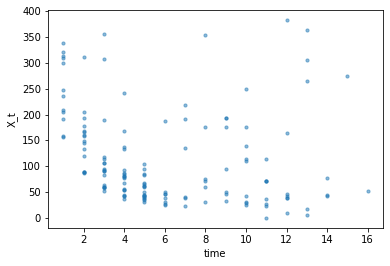

In [31]:
df2.plot.scatter(x='time', y='X_t',s=10,alpha=0.5)

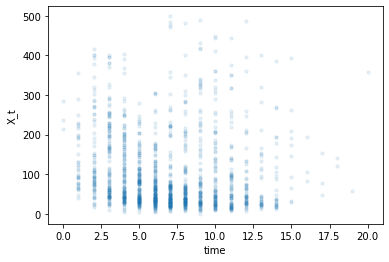

In [ ]:
df2[df2['X_t']<500].plot.scatter(x='time', y='X_t',s=10,alpha=0.1)

X_t가 100 이하인 비율(%): 60.689655172413794
X_t가 100 초과 200 이하인 비율(%): 24.137931034482758
X_t가 200 초과 300 이하인 비율(%): 7.586206896551724
X_t가 300 초과 400 이하인 비율(%): 7.586206896551724
X_t가 400 초과 500 이하인 비율(%): 0.0
X_t가 500 초과인 비율(%): 0.0


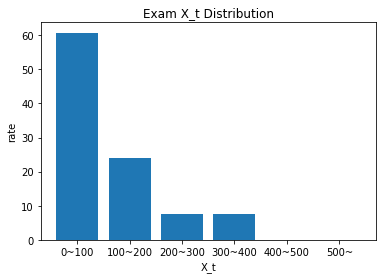

In [39]:
print('X_t가 100 이하인 비율(%):',(df2[df2['X_t']<=100].size) / (df2.size) * 100)
print('X_t가 100 초과 200 이하인 비율(%):',(df2[(df2['X_t']>100) & (df2['X_t']<=200)].size) / (df2.size) * 100)
print('X_t가 200 초과 300 이하인 비율(%):',(df2[(df2['X_t']>200) & (df2['X_t']<=300)].size) / (df2.size) * 100)
print('X_t가 300 초과 400 이하인 비율(%):',(df2[(df2['X_t']>300) & (df2['X_t']<=400)].size) / (df2.size) * 100)
print('X_t가 400 초과 500 이하인 비율(%):',(df2[(df2['X_t']>400) & (df2['X_t']<=500)].size) / (df2.size) * 100)
print('X_t가 500 초과인 비율(%):',(df2[df2['X_t']>500].size) / (df2.size) * 100)

x = np.arange(6)
distri = ['0~100','100~200','200~300','300~400','400~500','500~']
value = [(df2[df2['X_t']<=100].size) / (df2.size) * 100, (df2[(df2['X_t']>100) & (df2['X_t']<=200)].size) / (df2.size) * 100, \
         (df2[(df2['X_t']>200) & (df2['X_t']<=300)].size) / (df2.size) * 100, (df2[(df2['X_t']>300) & (df2['X_t']<=400)].size) / (df2.size) * 100, \
         (df2[(df2['X_t']>400) & (df2['X_t']<=500)].size) / (df2.size) * 100, (df2[df2['X_t']>500].size) / (df2.size) * 100]
plt.bar(x, value)
plt.xticks(x, distri)
plt.xlabel('X_t')
plt.ylabel('rate')
plt.title('Exam X_t Distribution')
plt.savefig('/gdrive/My Drive/DS_contest/Figures/Exam_X_t_six_Distribution.png')
plt.show()

X_t가 400이하(100%의 데이터)인 것을 normal로 잡자

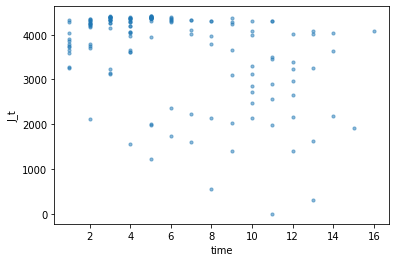

In [34]:
df2.plot.scatter(x='time', y='J_t',s=10,alpha=0.5)

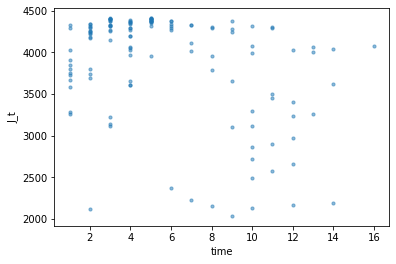

In [35]:
df2[df2['J_t']>2000].plot.scatter(x='time', y='J_t',s=10,alpha=0.5)

J_t가 500시간 이하인 비율(%): 1.3793103448275863
J_t가 500시간 초과 1000시간 이하인 비율(%): 0.6896551724137931
J_t가 1000시간 초과 1500시간 이하인 비율(%): 2.0689655172413794
J_t가 1500시간 초과 2000시간 이하인 비율(%): 5.517241379310345
J_t가 2000시간 초과 2500시간 이하인 비율(%): 6.206896551724138
J_t가 2500시간 초과 3000시간 이하인 비율(%): 4.137931034482759
J_t가 3000시간 초과 3500시간 이하인 비율(%): 8.275862068965518
J_t가 3500시간 초과 4000시간 이하인 비율(%): 14.482758620689657
J_t가 4000시간 초과인 비율(%): 57.24137931034483


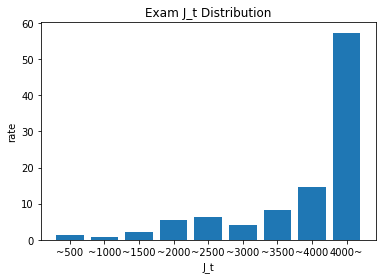

In [40]:
print('J_t가 500시간 이하인 비율(%):',(df2[df2['J_t']<=500].size) / (df2.size) * 100)
print('J_t가 500시간 초과 1000시간 이하인 비율(%):',(df2[(df2['J_t']>500) & (df2['J_t']<=1000)].size) / (df2.size) * 100)
print('J_t가 1000시간 초과 1500시간 이하인 비율(%):',(df2[(df2['J_t']>1000) & (df2['J_t']<=1500)].size) / (df2.size) * 100)
print('J_t가 1500시간 초과 2000시간 이하인 비율(%):',(df2[(df2['J_t']>1500) & (df2['J_t']<=2000)].size) / (df2.size) * 100)
print('J_t가 2000시간 초과 2500시간 이하인 비율(%):',(df2[(df2['J_t']>2000) & (df2['J_t']<=2500)].size) / (df2.size) * 100)
print('J_t가 2500시간 초과 3000시간 이하인 비율(%):',(df2[(df2['J_t']>2500) & (df2['J_t']<=3000)].size) / (df2.size) * 100)
print('J_t가 3000시간 초과 3500시간 이하인 비율(%):',(df2[(df2['J_t']>3000) & (df2['J_t']<=3500)].size) / (df2.size) * 100)
print('J_t가 3500시간 초과 4000시간 이하인 비율(%):',(df2[(df2['J_t']>3500) & (df2['J_t']<=4000)].size) / (df2.size) * 100)
print('J_t가 4000시간 초과인 비율(%):',(df2[df2['J_t']>4000].size) / (df2.size) * 100)

x = np.arange(9)
distri = ['~500','~1000','~1500','~2000','~2500','~3000','~3500','~4000','4000~']
value = [(df2[df2['J_t']<=500].size) / (df2.size) * 100, (df2[(df2['J_t']>500) & (df2['J_t']<=1000)].size) / (df2.size) * 100, \
         (df2[(df2['J_t']>1000) & (df2['J_t']<=1500)].size) / (df2.size) * 100, (df2[(df2['J_t']>1500) & (df2['J_t']<=2000)].size) / (df2.size) * 100, \
         (df2[(df2['J_t']>2000) & (df2['J_t']<=2500)].size) / (df2.size) * 100, (df2[(df2['J_t']>2500) & (df2['J_t']<=3000)].size) / (df2.size) * 100, \
         (df2[(df2['J_t']>3000) & (df2['J_t']<=3500)].size) / (df2.size) * 100, (df2[(df2['J_t']>3500) & (df2['J_t']<=4000)].size) / (df2.size) * 100, \
         (df2[df2['J_t']>4000].size) / (df2.size) * 100]
plt.bar(x, value)
plt.xticks(x, distri)
plt.xlabel('J_t')
plt.ylabel('rate')
plt.title('Exam J_t Distribution')
plt.savefig('/gdrive/My Drive/DS_contest/Figures/Exam_J_t_six_Distribution.png')
plt.show()

J_t는 2000시간 초과를(약 92.5%의 데이터) normal이라 하자


In [41]:
df2['normal'] = (df2['X_t']<=400) & (df2['J_t']>2000)
df2 = df2.astype({'normal':'int'})
df2.head(5)

,No,PRICE ($),Per Month Operation Cost ($),Y_t,J_t,ID index,time,X_t,normal
15,724,292000,30000,356157.0,2035.0,0,9,175.015725,1
15,724,292000,30000,502263.0,2863.0,0,10,175.432414,1
15,724,292000,30000,250323.0,3502.0,0,11,71.480011,1
15,724,292000,30000,103344.0,2664.0,0,12,38.792793,1
15,724,292000,30000,68169.0,4006.0,0,13,17.016725,1


In [42]:
#data_[i]는 index i 생산정의 데이터
#data_x[i]는 index i 생산정의 데이터 중 normal인 것
data_ = []
for i in range(29):
  data_.append(df2[df2['ID index']==i])

In [43]:
data_x = []
for i in range(29):
  data_x.append(df2[(df2['ID index']==i) & (df2['X_t']<=400) & (df2['J_t']>2000)])

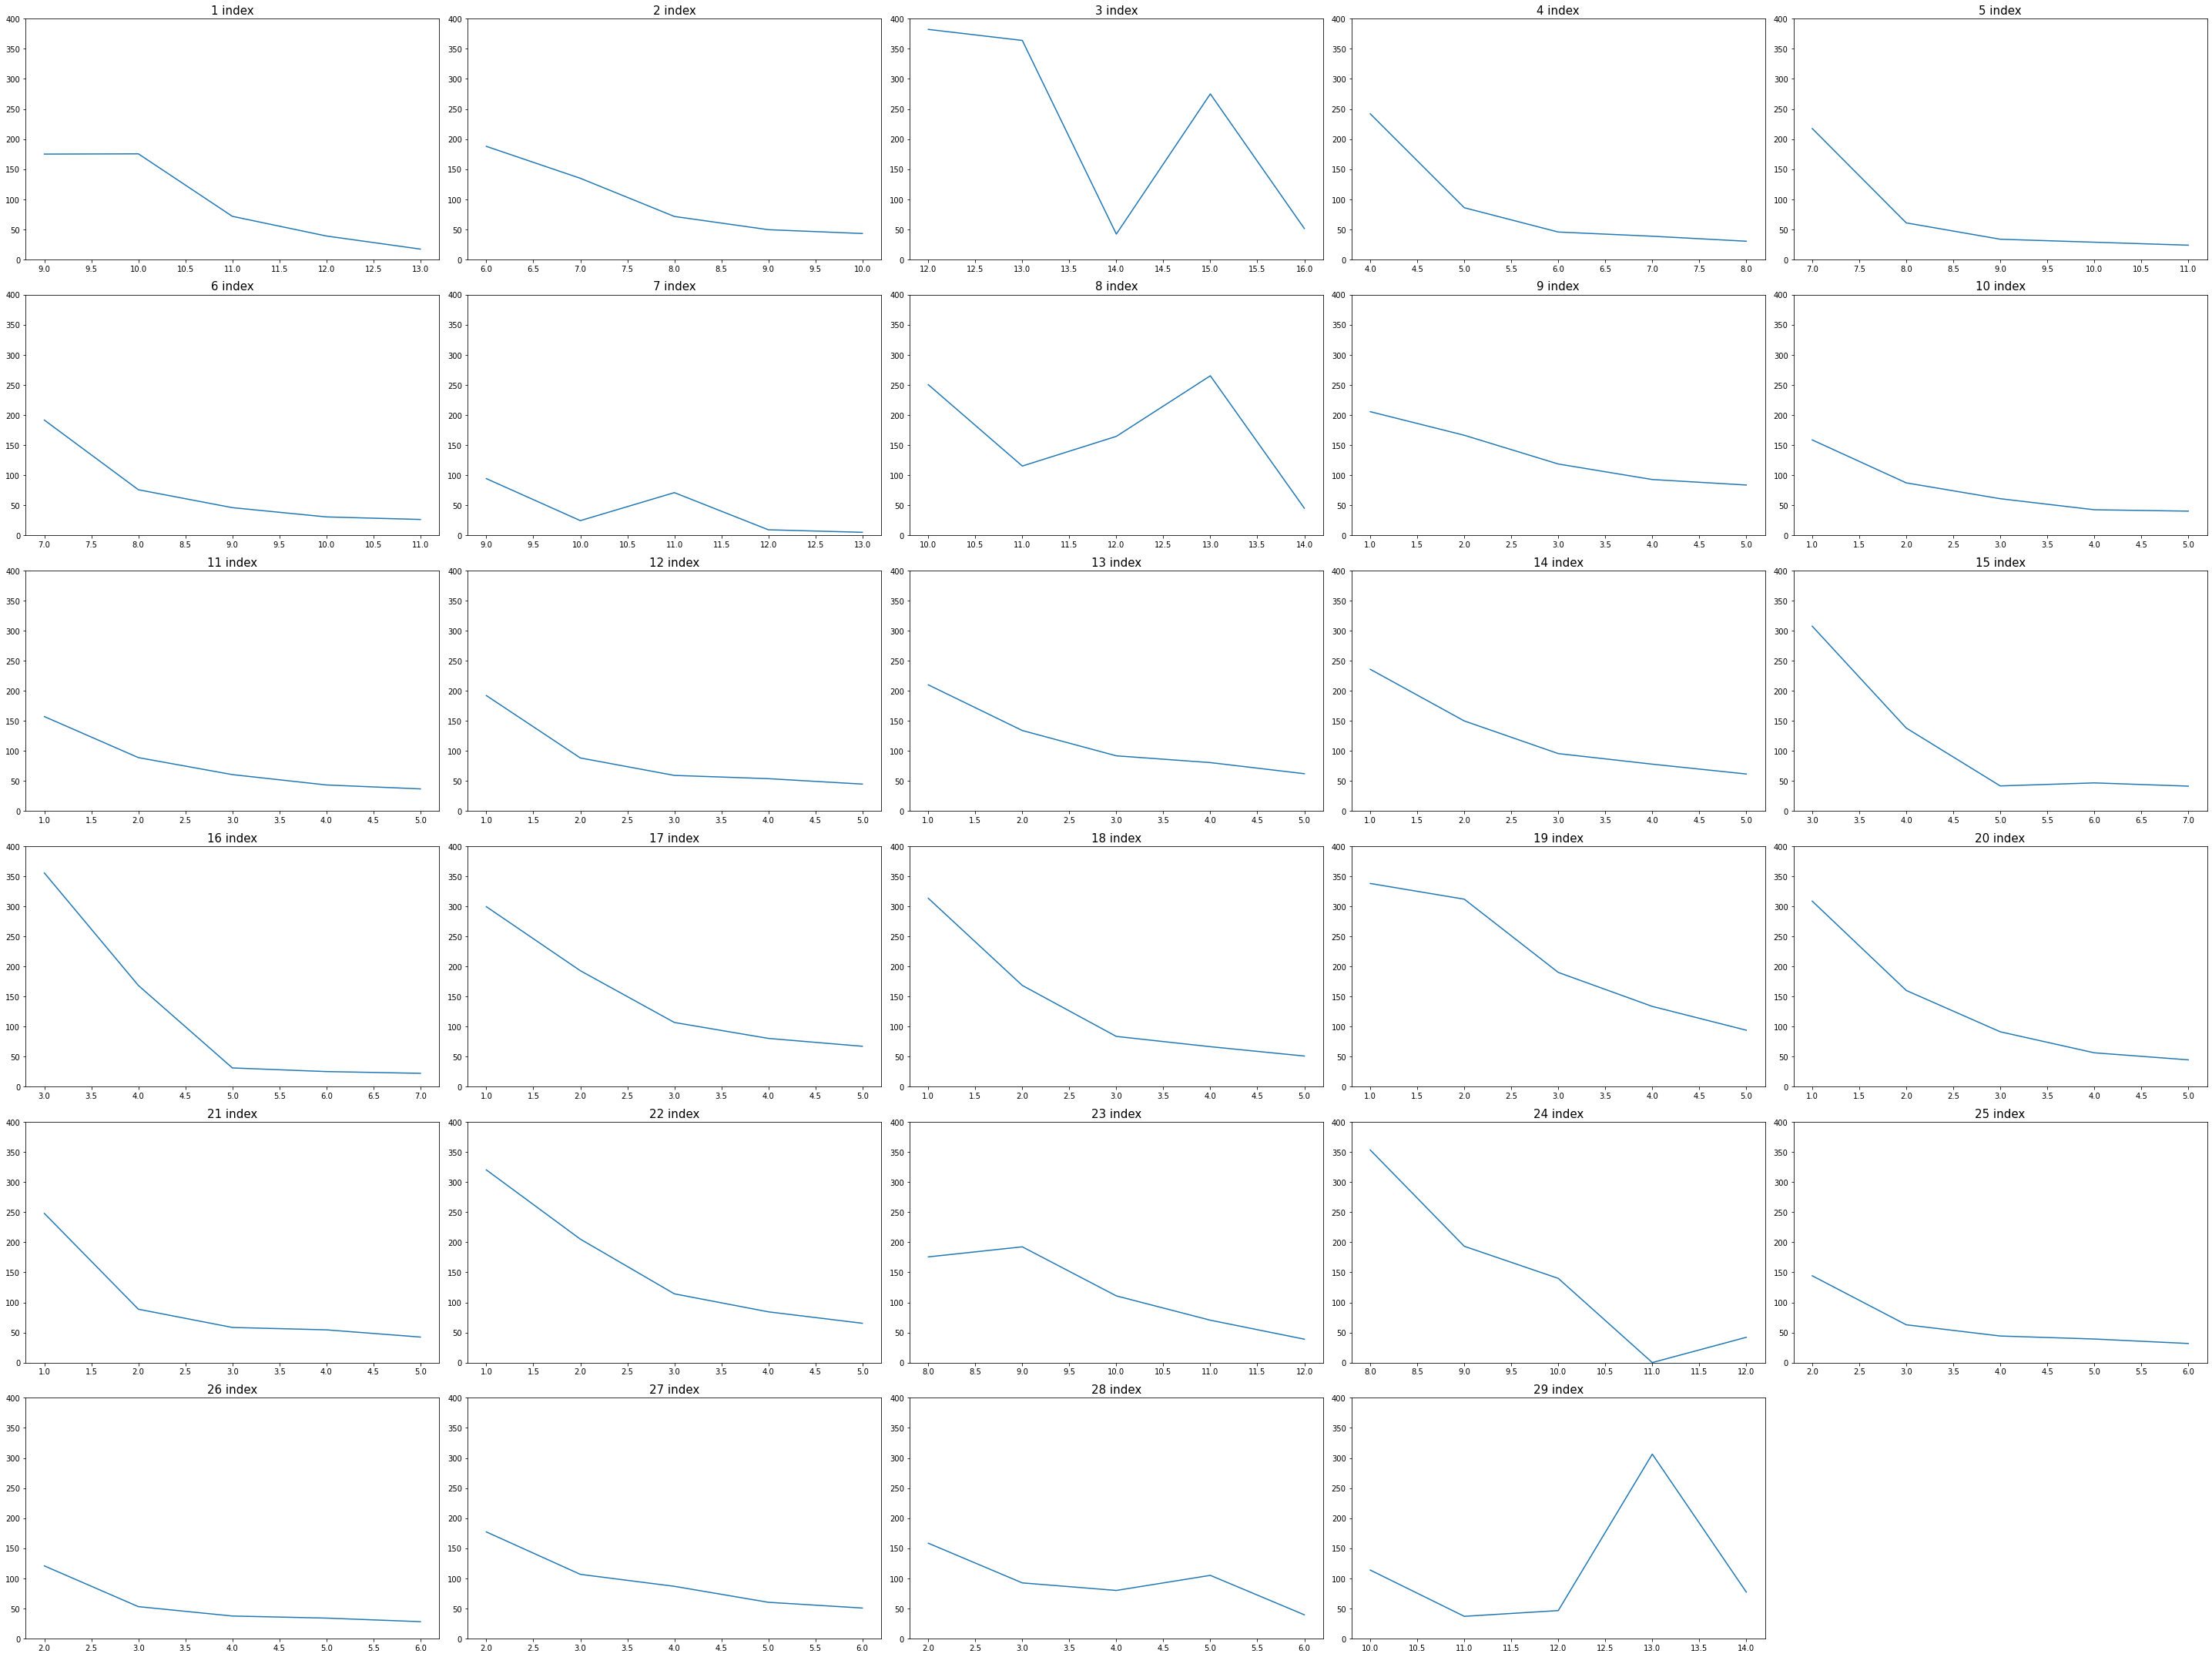

In [60]:
plt.figure(figsize = (40,30))
for i in range(29):
  ax = plt.subplot(6,5,i+1)
  plt.title('%d index' %(i+1),fontsize=15)
  ax.plot(data_[i]['time'],data_[i]['X_t'],'-')
  plt.ylim([0,400])

plt.tight_layout()
plt.savefig('/gdrive/My Drive/DS_contest/Figures/Exam_X_t_six-time.png')
plt.show()

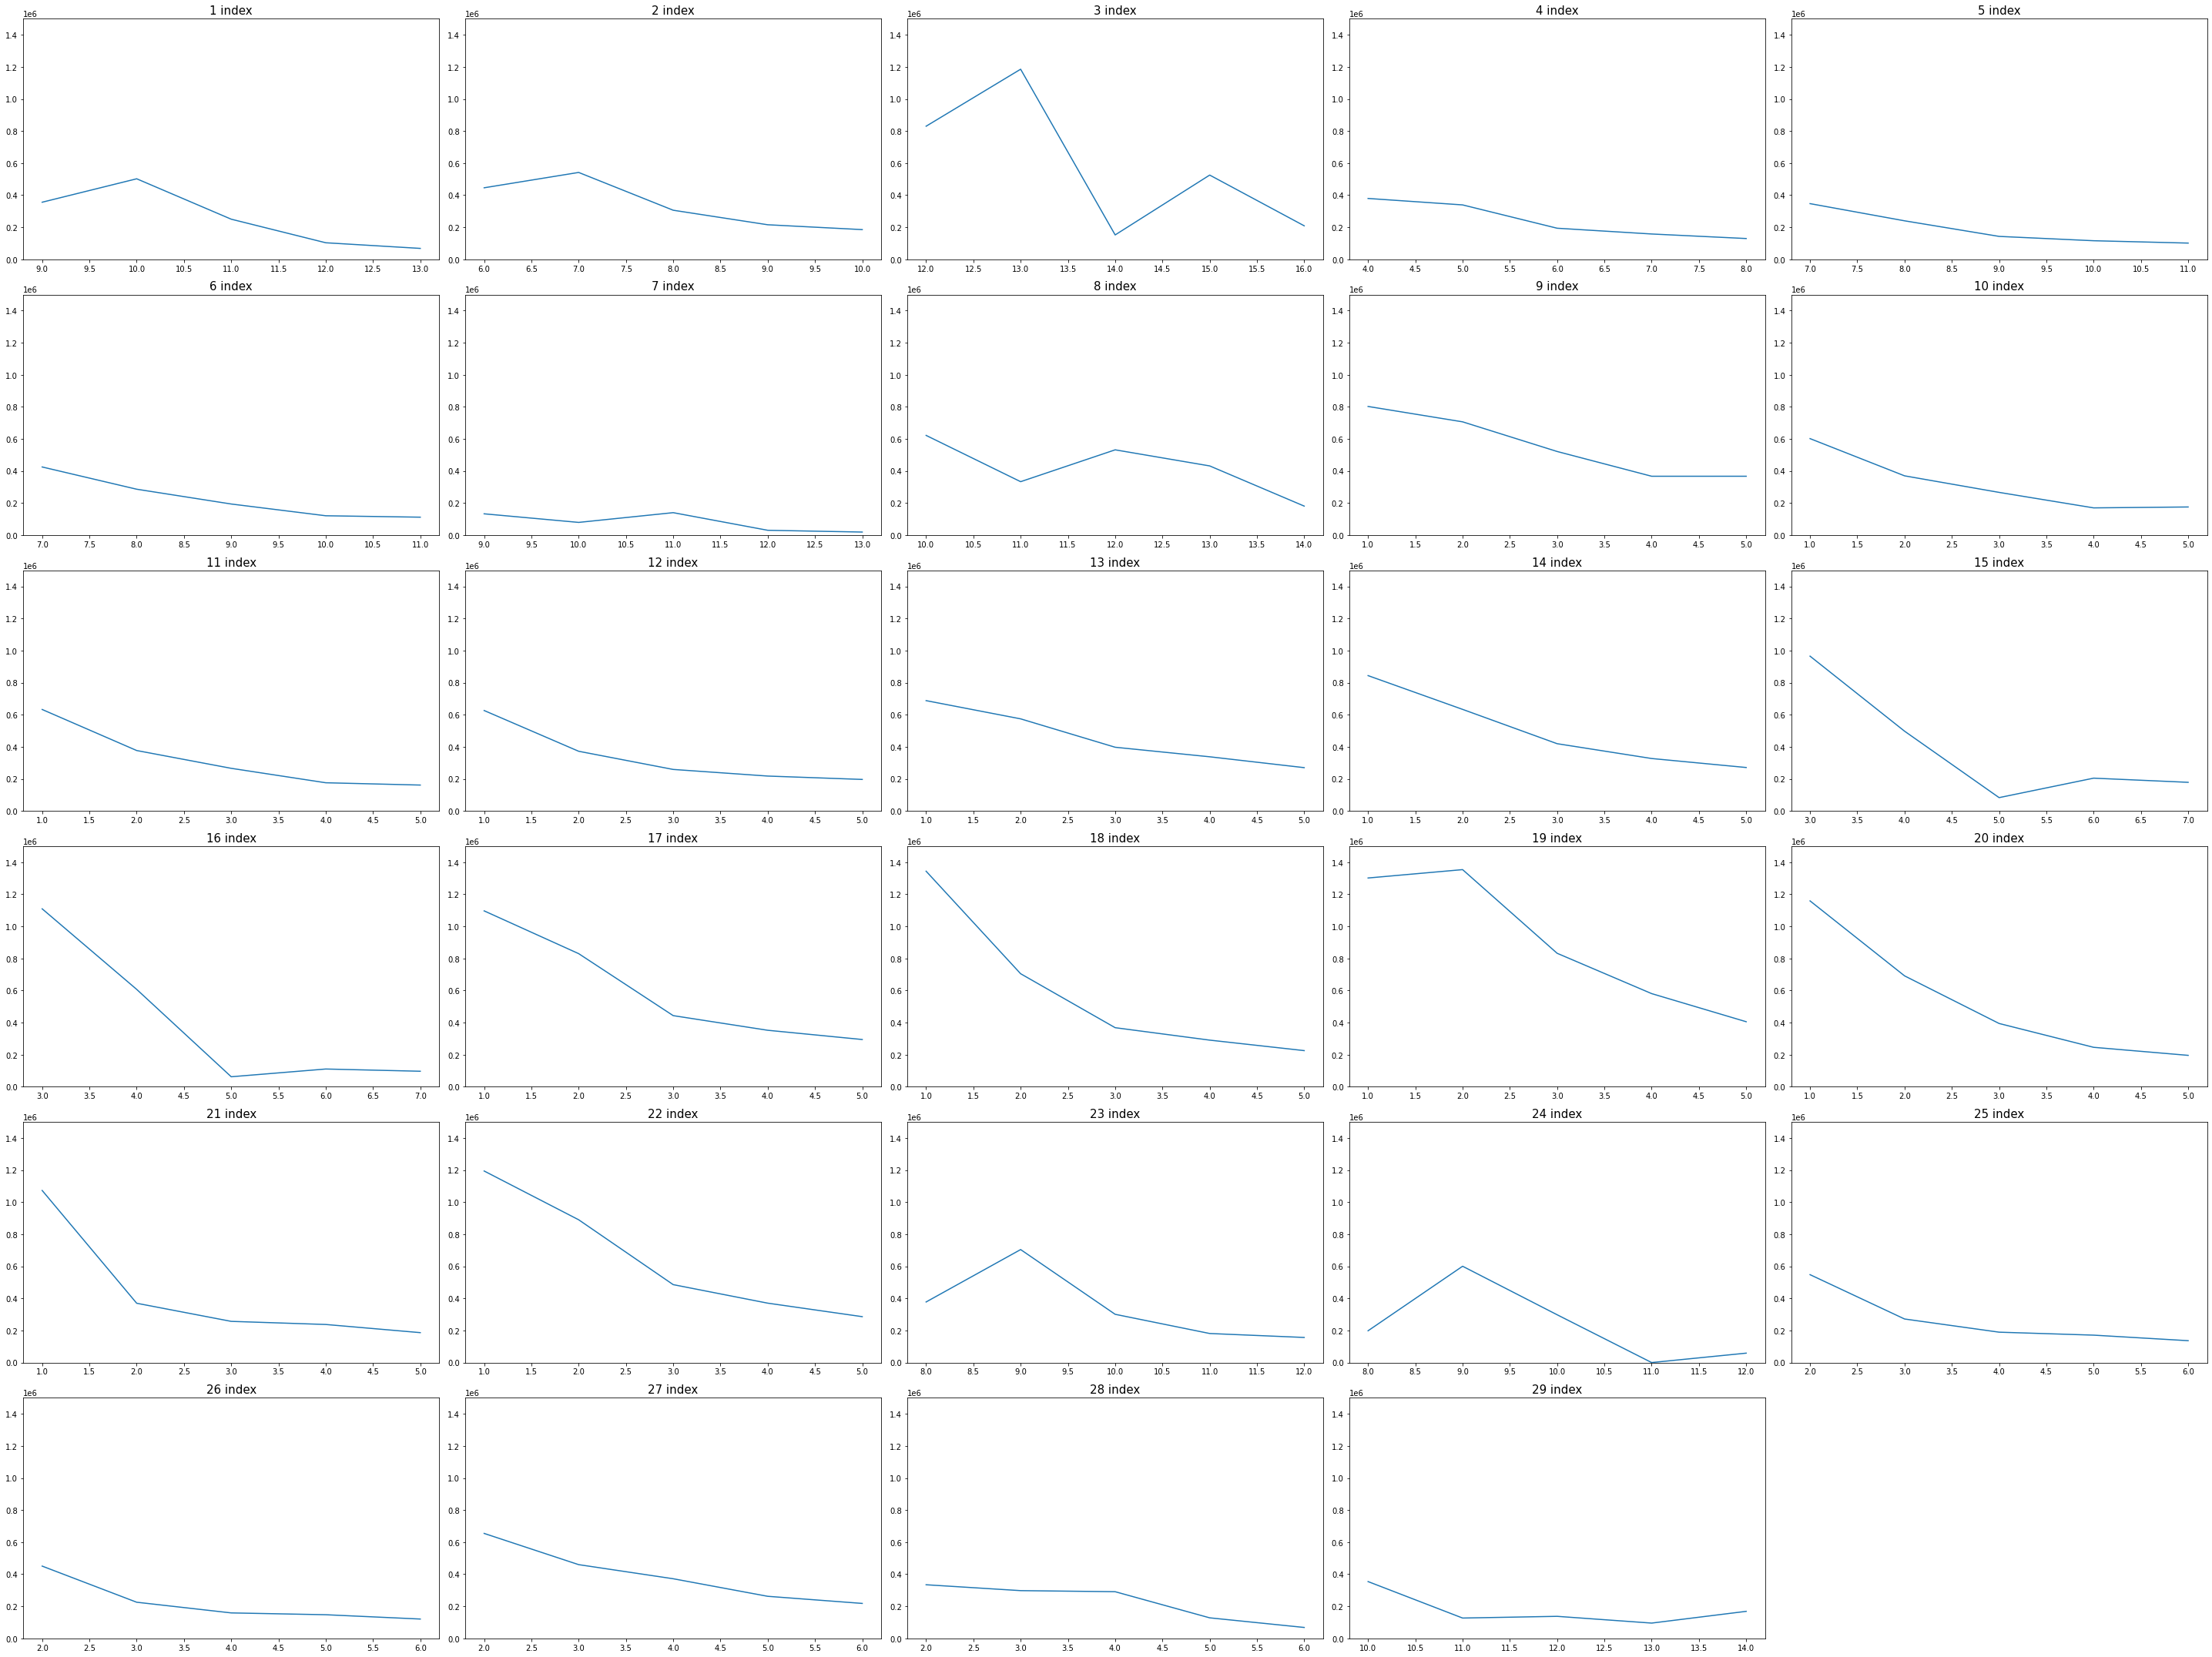

In [59]:
plt.figure(figsize = (40,30))
for i in range(29):
  ax = plt.subplot(6,5,i+1)
  plt.title('%d index' %(i+1),fontsize=15)
  ax.plot(data_[i]['time'],data_[i]['Y_t'],'-')
  plt.ylim([0,1500000])

plt.tight_layout()
plt.savefig('/gdrive/My Drive/DS_contest/Figures/Exam_Y_t_six-time.png')
plt.show()

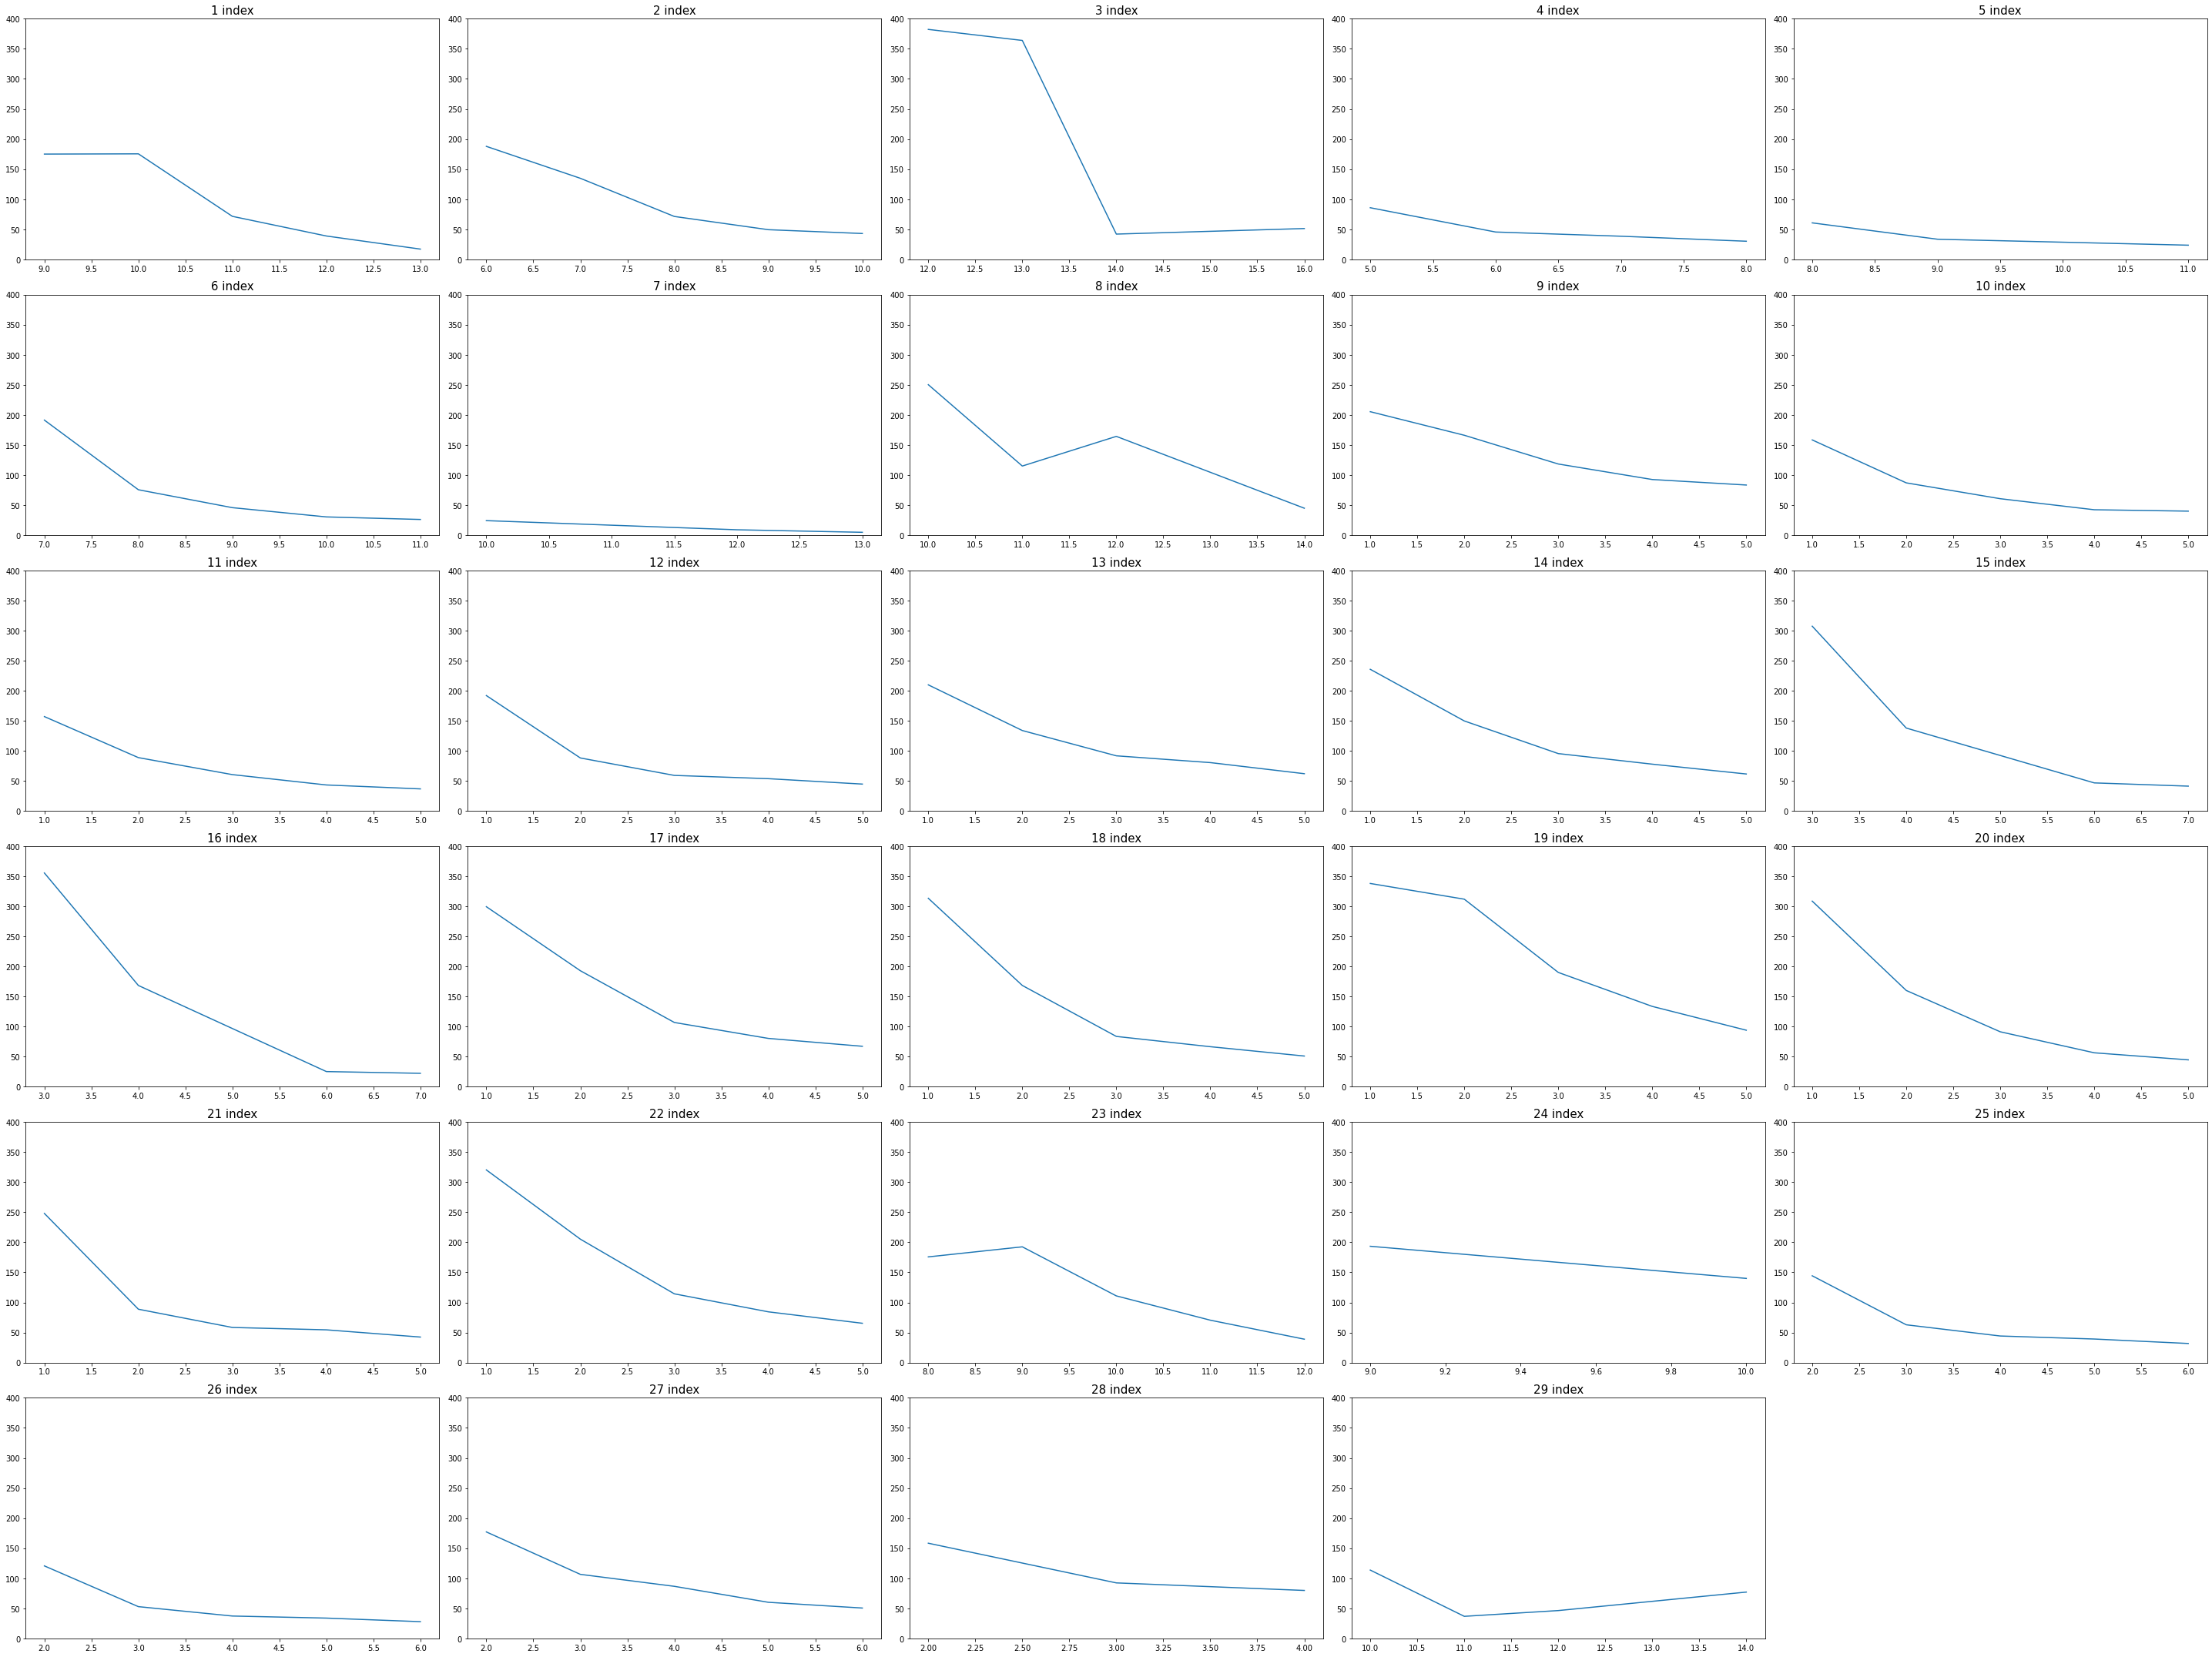

In [58]:
plt.figure(figsize = (40,30))
for i in range(29):
  ax = plt.subplot(6,5,i+1)
  plt.title('%d index' %(i+1),fontsize=15)
  ax.plot(data_x[i]['time'],data_x[i]['X_t'],'-')
  plt.ylim([0,400])

plt.tight_layout()
plt.savefig('/gdrive/My Drive/DS_contest/Figures/Exam_X_t_six-time(normal).png')
plt.show()

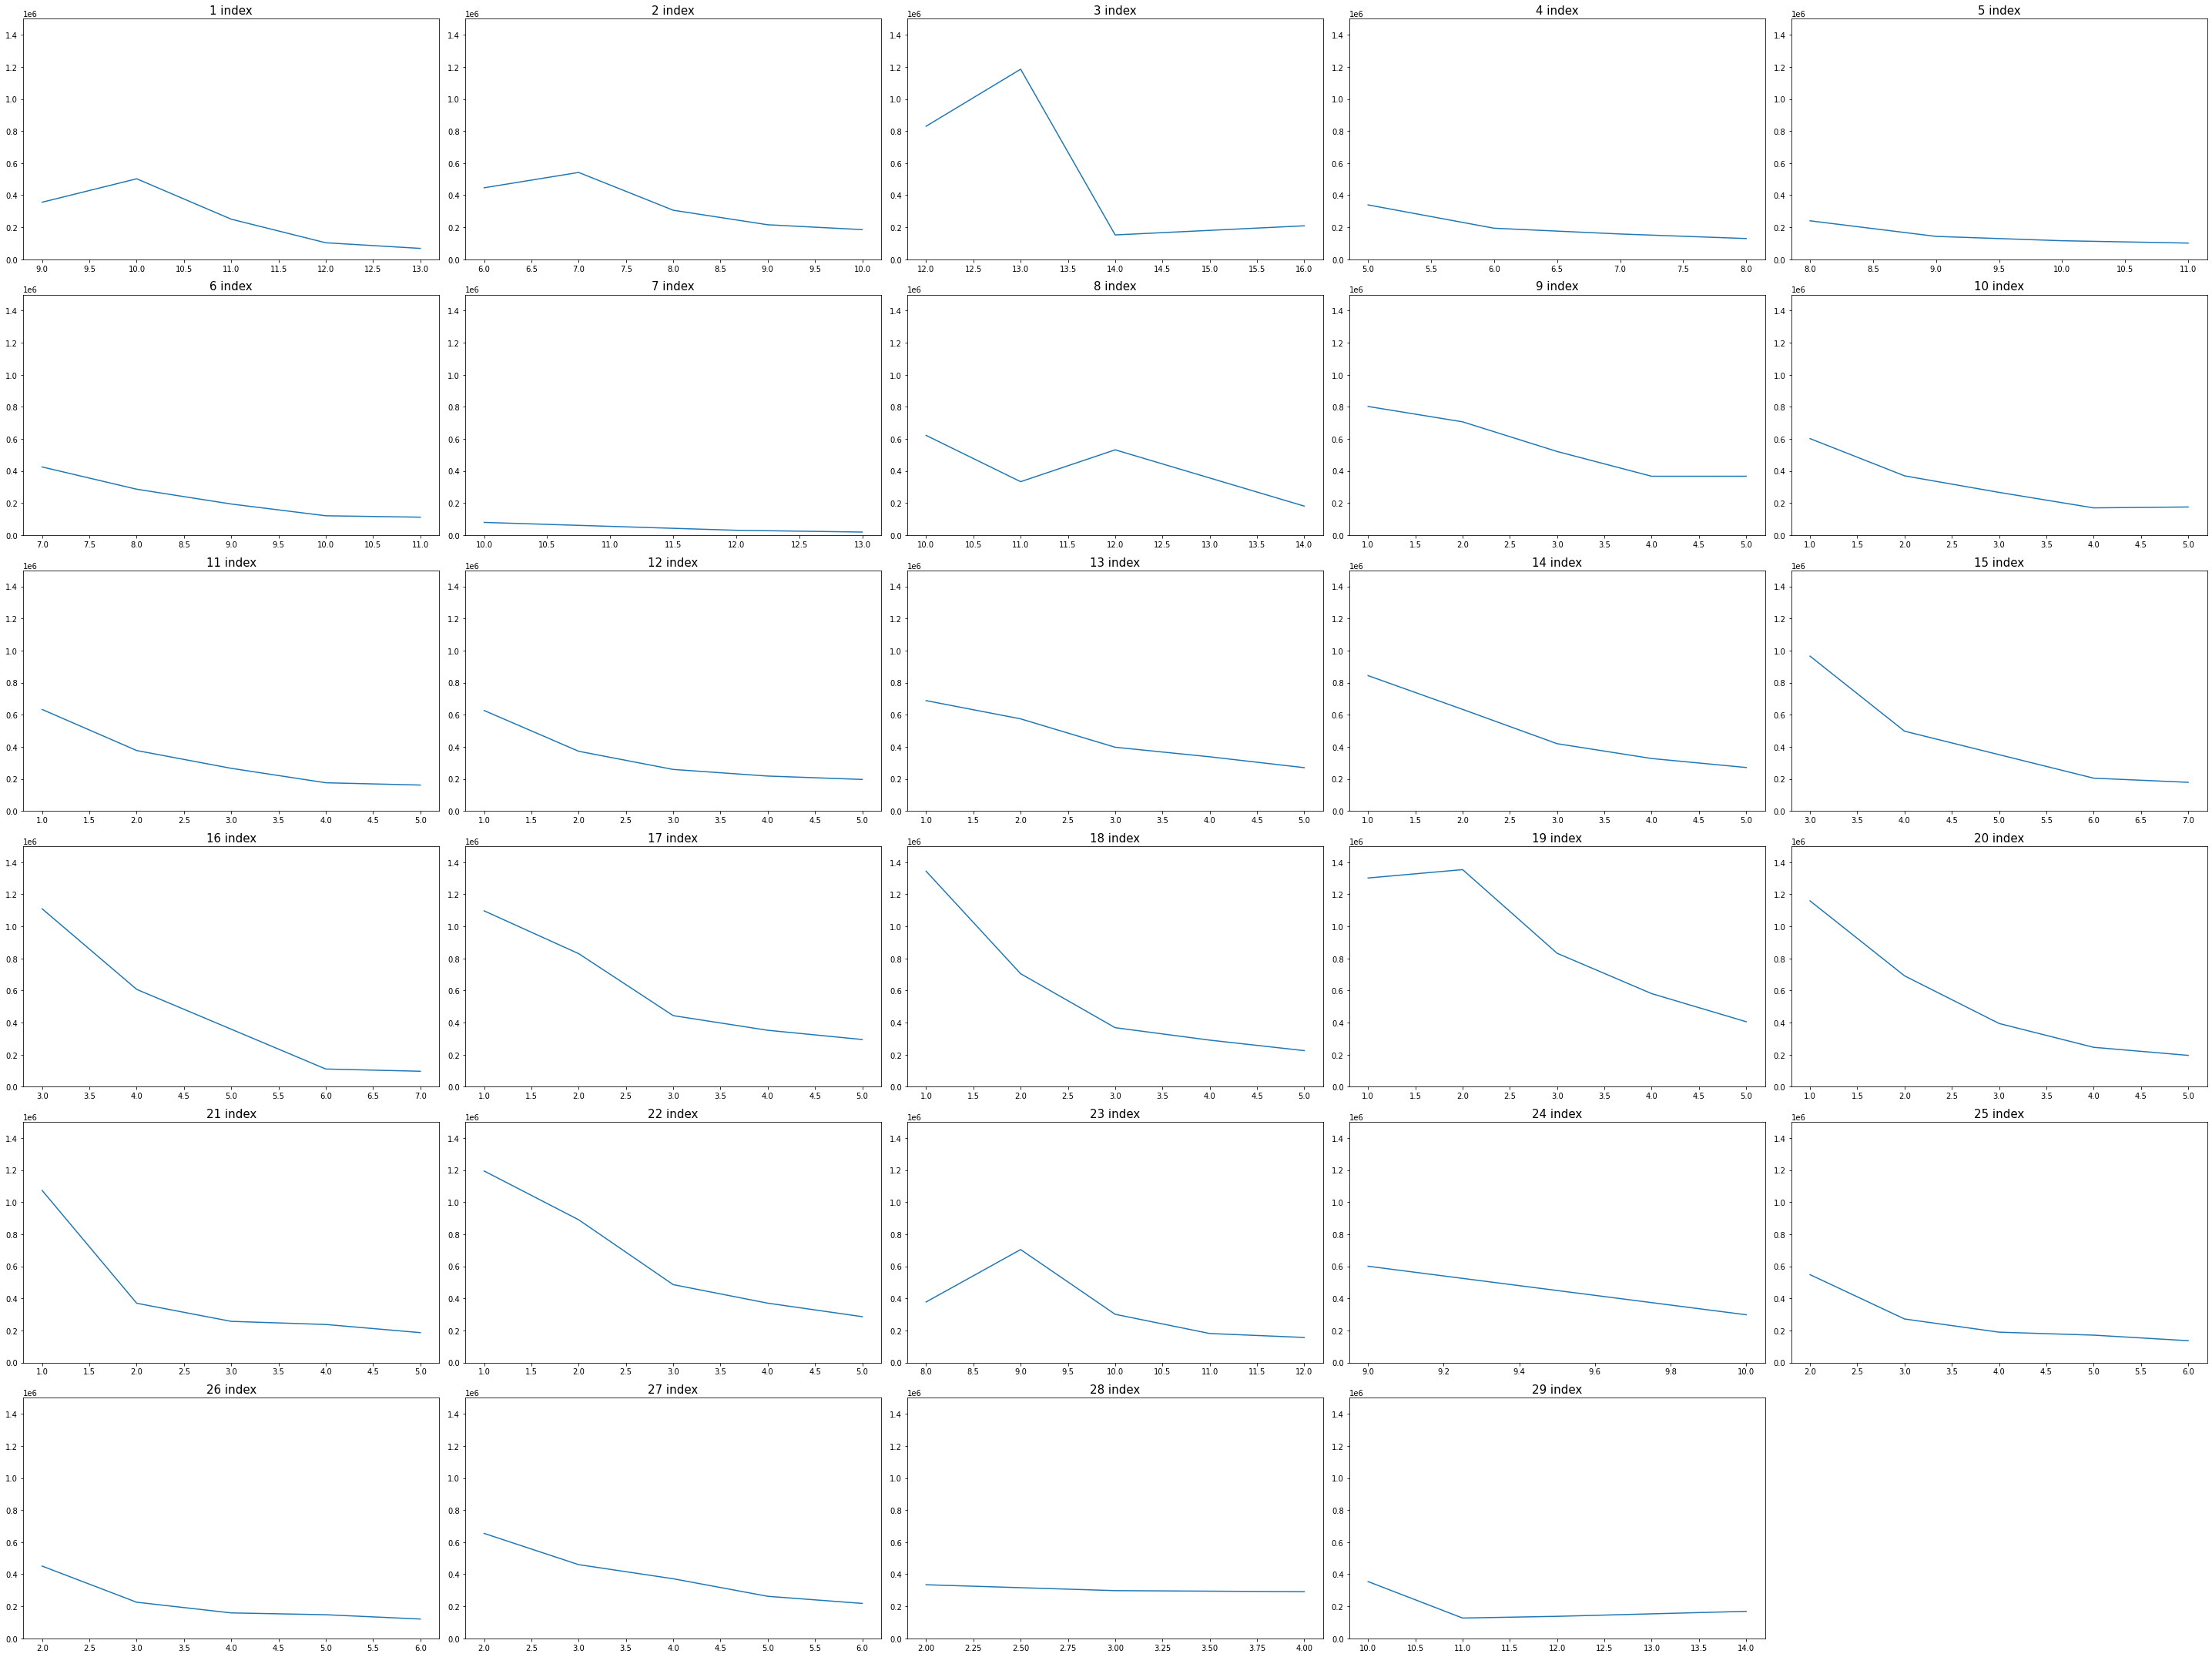

In [57]:
plt.figure(figsize = (40,30))
for i in range(29):
  ax = plt.subplot(6,5,i+1)
  plt.title('%d index' %(i+1),fontsize=15)
  ax.plot(data_x[i]['time'],data_x[i]['Y_t'],'-')
  plt.ylim([0,1500000])

plt.tight_layout()
plt.savefig('/gdrive/My Drive/DS_contest/Figures/Exam_Y_t_six-time(normal).png')
plt.show()

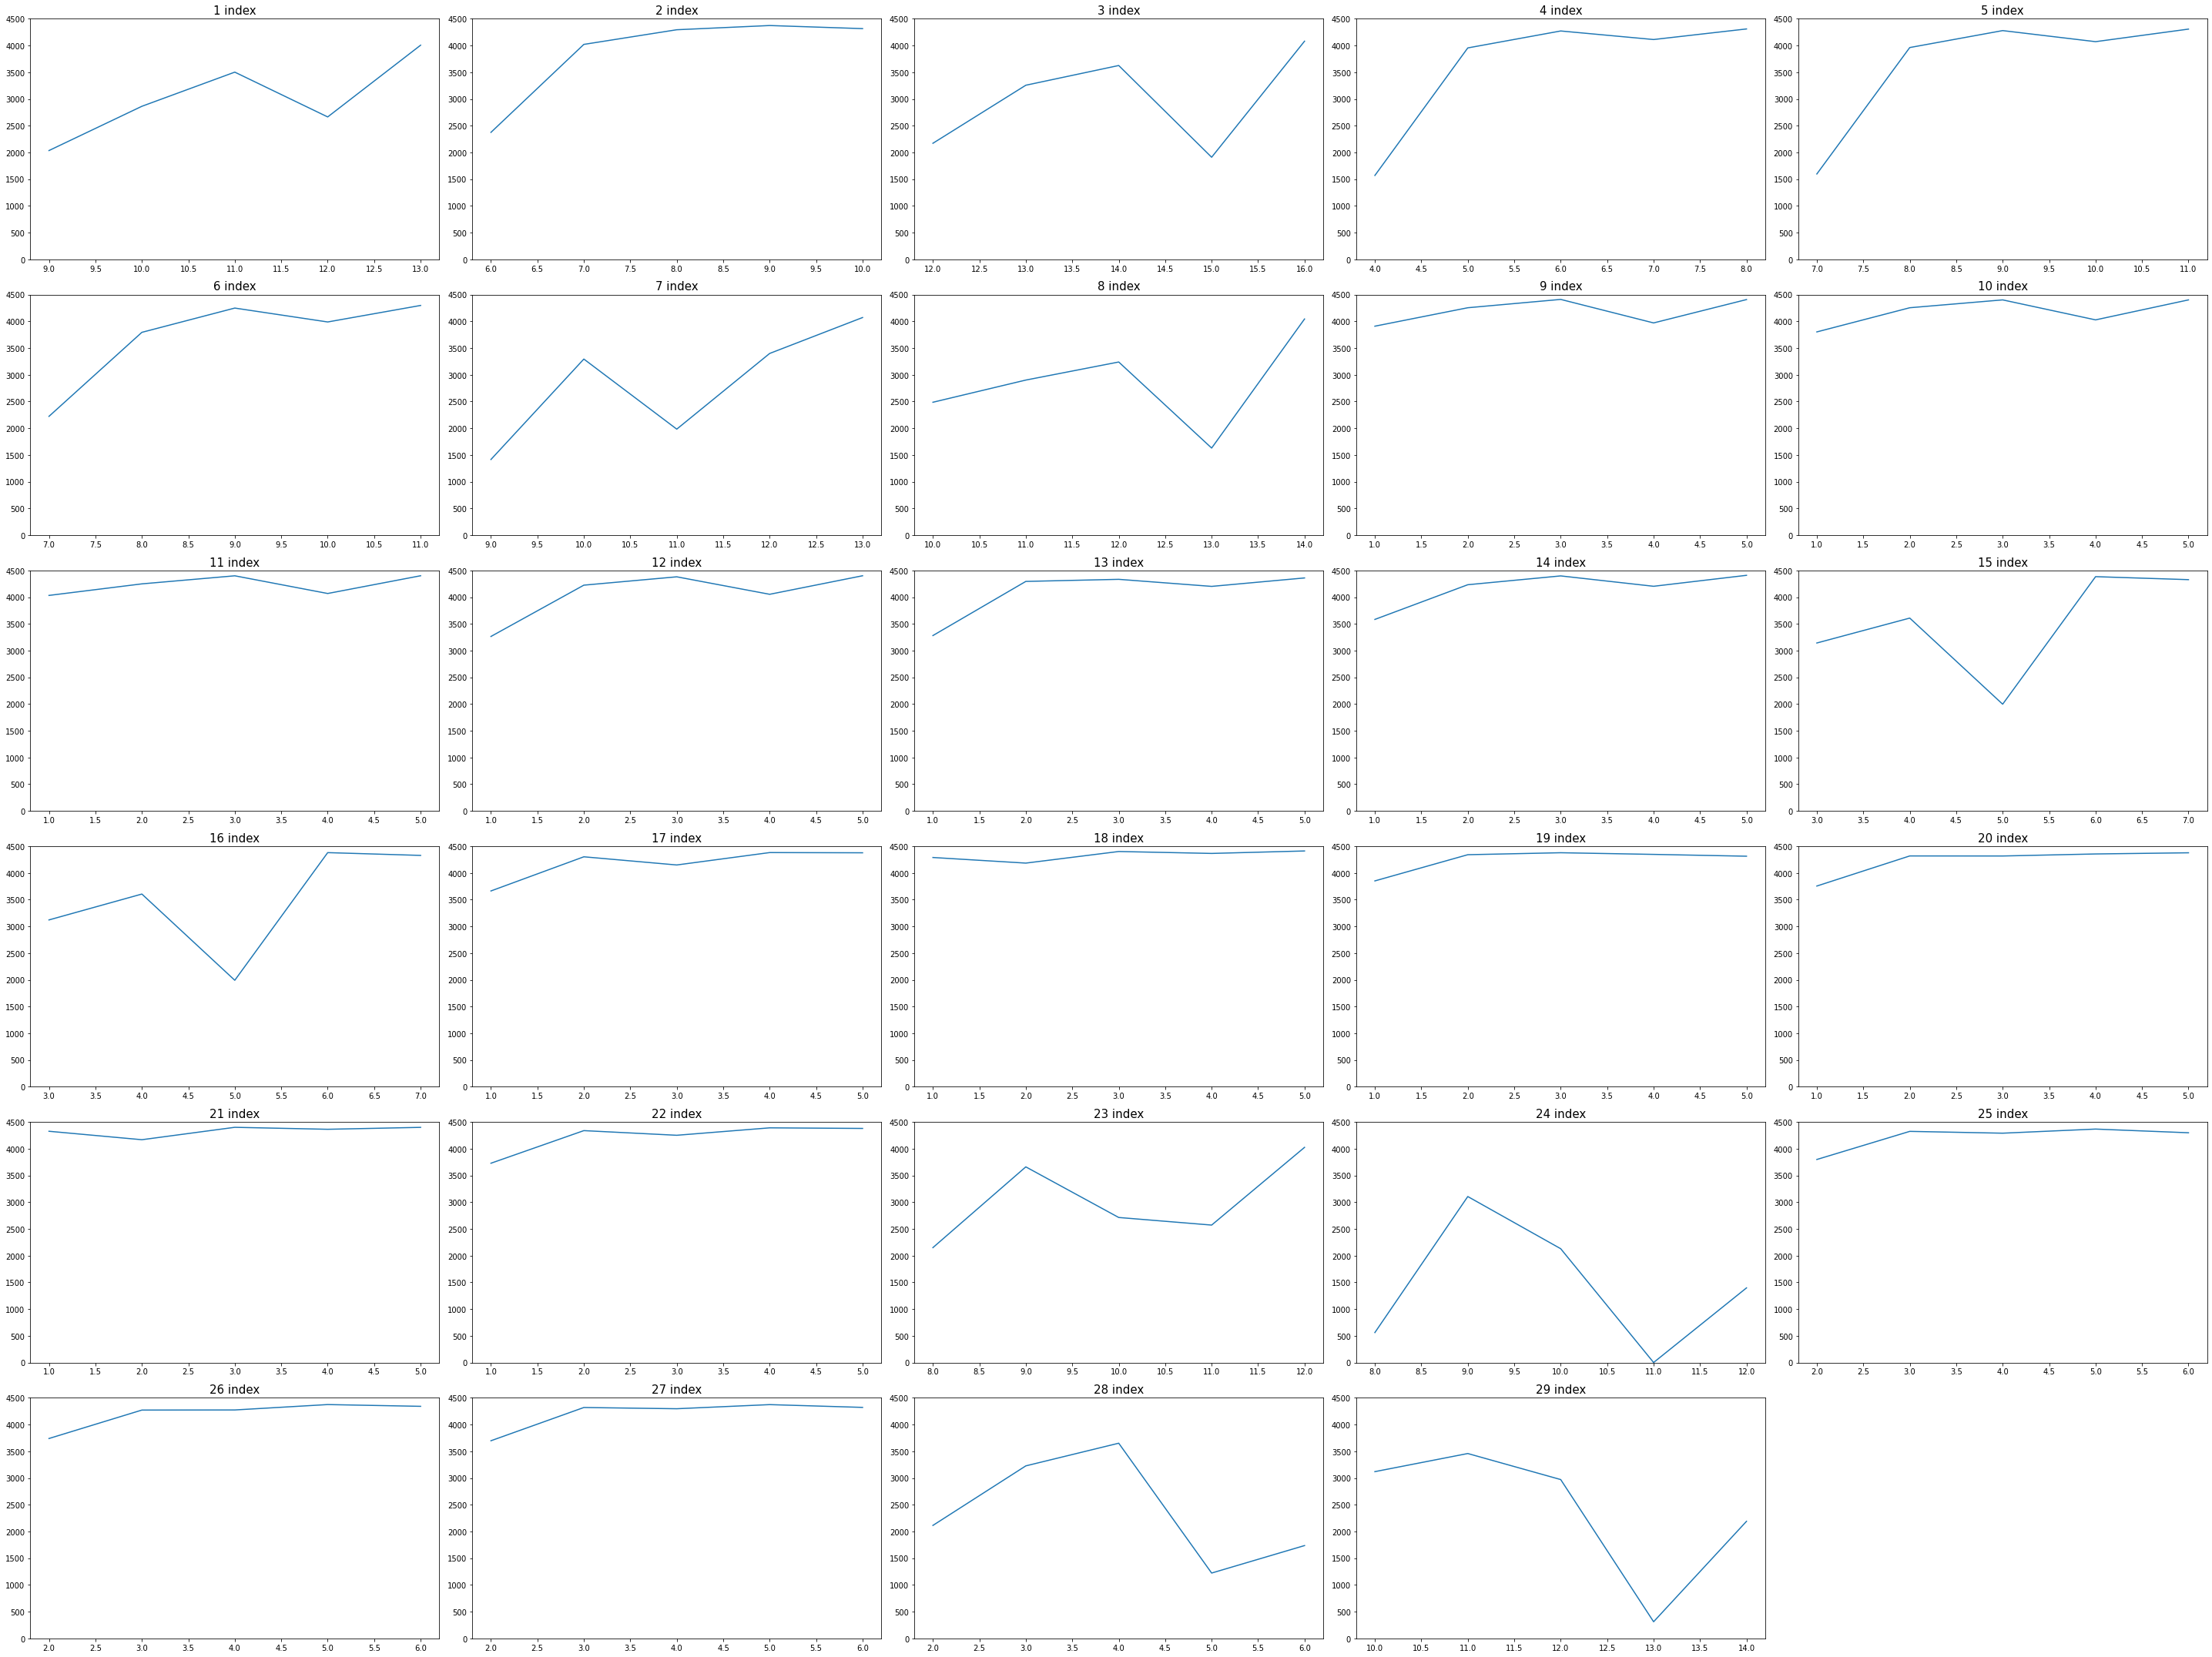

In [52]:
plt.figure(figsize = (40,30))
for i in range(29):
  ax = plt.subplot(6,5,i+1)
  plt.title('%d index' %(i+1),fontsize=15)
  ax.plot(data_[i]['time'],data_[i]['J_t'],'-')
  plt.ylim([0,4500])

plt.tight_layout()
plt.savefig('/gdrive/My Drive/DS_contest/Figures/Exam_J_t_six-time.png')
plt.show()